In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'

## COMPETITION IN CONSTANT ENVIRONMENT

In [3]:
def R_fun(s,e=1,s_max=1,Rmin=0.9,Rmax=0.99):
    r=Rmax+(Rmin-Rmax)*(s/s_max)/(e-(e-1)*(s/s_max))
    return(r)

def e_log(a,e=1,a_min=1e-12,a_max=1e-5,e_min=0.9,e_max=0.99):
    a=a_max*(np.log10(a)-np.log10(a_min))/(np.log10(a_max)-np.log10(a_min))
    epsilon=e_max+(e_min-e_max)*(a/a_max)/(e-(e-1)*(a/a_max))
    return(epsilon)

In [4]:
def mges_incompatibles_deterministe(t,B,a,s,e,r,d):
    # a: vecteur des taux de transfert horizontal
    # s: vecteur des taux de résistance
    # e: vecteur des taux de dégradation des MGEs (lors de la réplication)
    # r: vecteur des taux de réplication basal
    # d: taux de lyse basal

    N=np.sum(B)
    
    Y0=(r[0]-f1(t,s[0])-d*N)*B[0]-np.sum(B[1:]*np.dot(a,B[0]))+np.sum(B[1:]*r[1:]*(1-e))
    Y=(r[1:]*e-f1(t,s[1:])-d*N)*B[1:]+B[1:]*np.dot(a,B[0])
    Y=list(Y)
    Y.insert(0,Y0)
    return(np.array(Y))

In [7]:
def f1(t,s):
    return 0

d=1e-6
alpha=np.array([1e-6,1e-5])
s=np.array([0,1,0])
e=np.array([0.95,0.9])
r=np.array([1,0.9,0.99])

B=np.array([1e6/3,1e6/3,1e6/3])
B1=np.array([1e6/3,1e6/3,0])
B2=np.array([1e6/3,0,1e6/3])

solution1 = solve_ivp(mges_incompatibles_deterministe,[0,100],B,args=[alpha,s,e,r,d],max_step=0.5)
solution1_1 = solve_ivp(mges_incompatibles_deterministe,[0,100],B1,args=[alpha,s,e,r,d],max_step=0.5)
solution1_2 = solve_ivp(mges_incompatibles_deterministe,[0,100],B2,args=[alpha,s,e,r,d],max_step=0.5)

def f1(t,s):
    return 0.9*(1-s)

solution2 = solve_ivp(mges_incompatibles_deterministe,[0,100],B,args=[alpha,s,e,r,d],max_step=0.5)
solution2_1 = solve_ivp(mges_incompatibles_deterministe,[0,100],B1,args=[alpha,s,e,r,d],max_step=0.5)
solution2_2 = solve_ivp(mges_incompatibles_deterministe,[0,100],B2,args=[alpha,s,e,r,d],max_step=0.5)

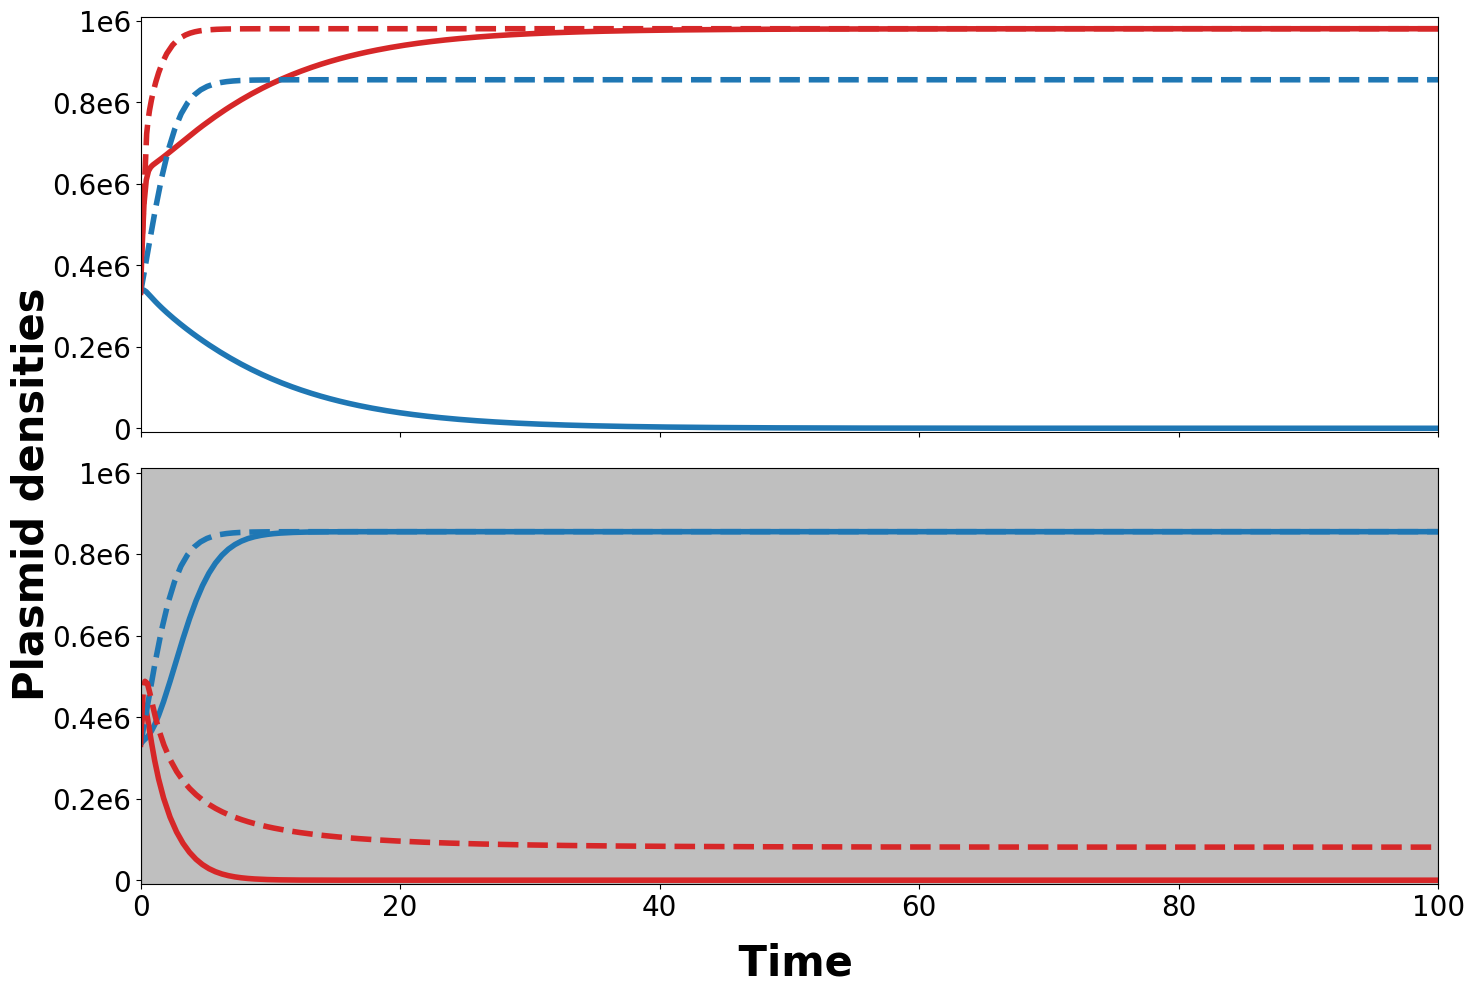

In [10]:
fig, axs = plt.subplots(2,1,figsize=(15,10),sharex=True,sharey=True)

axs[0].plot(solution1.t,solution1.y[1],color="tab:blue",label="Plasmid 1",linewidth=4)
axs[0].plot(solution1.t,solution1.y[2],color="tab:red",label="Plasmid 2",linewidth=4)

axs[0].plot(solution1_1.t,solution1_1.y[1],color="tab:blue",label="Plasmid 1",linewidth=4,linestyle="dashed")
axs[0].plot(solution1_2.t,solution1_2.y[2],color="tab:red",label="Plasmid 2",linewidth=4,linestyle="dashed")

axs[0].tick_params(axis='both', labelsize=20)

axs[1].plot(solution2.t,solution2.y[1],color="tab:blue",label="Plasmid 1",linewidth=4)
axs[1].plot(solution2.t,solution2.y[2],color="tab:red",label="Plasmid 2",linewidth=4)

axs[1].plot(solution2_1.t,solution2_1.y[1],color="tab:blue",linewidth=4,linestyle="dashed")
axs[1].plot(solution2_2.t,solution2_2.y[2],color="tab:red",linewidth=4,linestyle="dashed")

axs[1].fill_between(solution2.t,-100000,1e7,alpha=0.5,color='grey')

axs[1].tick_params(axis='both', labelsize=20)
axs[1].set_yticks(ticks=[0,0.2e6,0.4e6,0.6e6,0.8e6,1e6])
axs[1].set_yticklabels(['0','0.2e6','0.4e6','0.6e6','0.8e6','1e6'])
axs[1].set_ylim(-10000,1.01e6)

axs[1].set_xticks(ticks=[0,20,40,60,80,100])
axs[1].set_xticklabels([0,20,40,60,80,100])
axs[1].set_xlim(0,100)

#axs[1].legend(fontsize=30,loc="center right")

fig.supylabel('Plasmid densities',size=30,weight="bold")
fig.supxlabel("         Time",size=30,weight="bold")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

## COMPETITION UNDER FLUCTUATING ENVIRONMENT

### Temporal dynamics

In [13]:
def construction_stress_periodic_1(T,dt,d1,d2,i_min,i_max):
    # d1: stress duration
    # d2: no stress duration
    # i_min, i_max: min and max stress intenisty
    
    stress=np.array([])
    
    while np.size(stress)<=int(T/dt):
        stress=np.concatenate((stress,np.zeros(int(d2/dt)),np.repeat(np.random.uniform(i_min,i_max),int(d1/dt))))
    
    return stress[:(int(T/dt)+1)]

In [14]:
def f1(t,s):
    return S1[int(t/0.1)]*(1-s)

d=1e-6
alpha=np.array([1e-6,1e-5])
s=np.array([0,1,0])
e=np.array([0.95,0.9])
r=np.array([1,0.9,0.99])

B=np.array([1e6/3,1e6/3,1e6/3])

S1=construction_stress_periodic_1(1000,0.1,5,55,0.9,0.9)
solution1 = solve_ivp(mges_incompatibles_deterministe,[0,1000],B,args=[alpha,s,e,r,d],max_step=0.5)

In [15]:
def f1(t,s):
    return S2[int(t/0.1)]*(1-s)

d=1e-6
alpha=np.array([1e-6,1e-5])
s=np.array([0,1,0])
e=np.array([0.95,0.9])
r=np.array([1,0.9,0.99])

B=np.array([1e6/3,1e6/3,1e6/3])

S2=construction_stress_periodic_1(1000,0.1,25,55,0.9,0.9)
solution2 = solve_ivp(mges_incompatibles_deterministe,[0,1000],B,args=[alpha,s,e,r,d],max_step=0.5)

In [16]:
def f1(t,s):
    return S3[int(t/0.1)]*(1-s)

d=1e-6
alpha=np.array([1e-6,1e-5])
s=np.array([0,1,0])
e=np.array([0.95,0.9])
r=np.array([1,0.9,0.99])

B=np.array([1e6/3,1e6/3,1e6/3])

S3=construction_stress_periodic_1(1000,0.1,65,55,0.9,0.9)
solution3 = solve_ivp(mges_incompatibles_deterministe,[0,1000],B,args=[alpha,s,e,r,d],max_step=0.5)

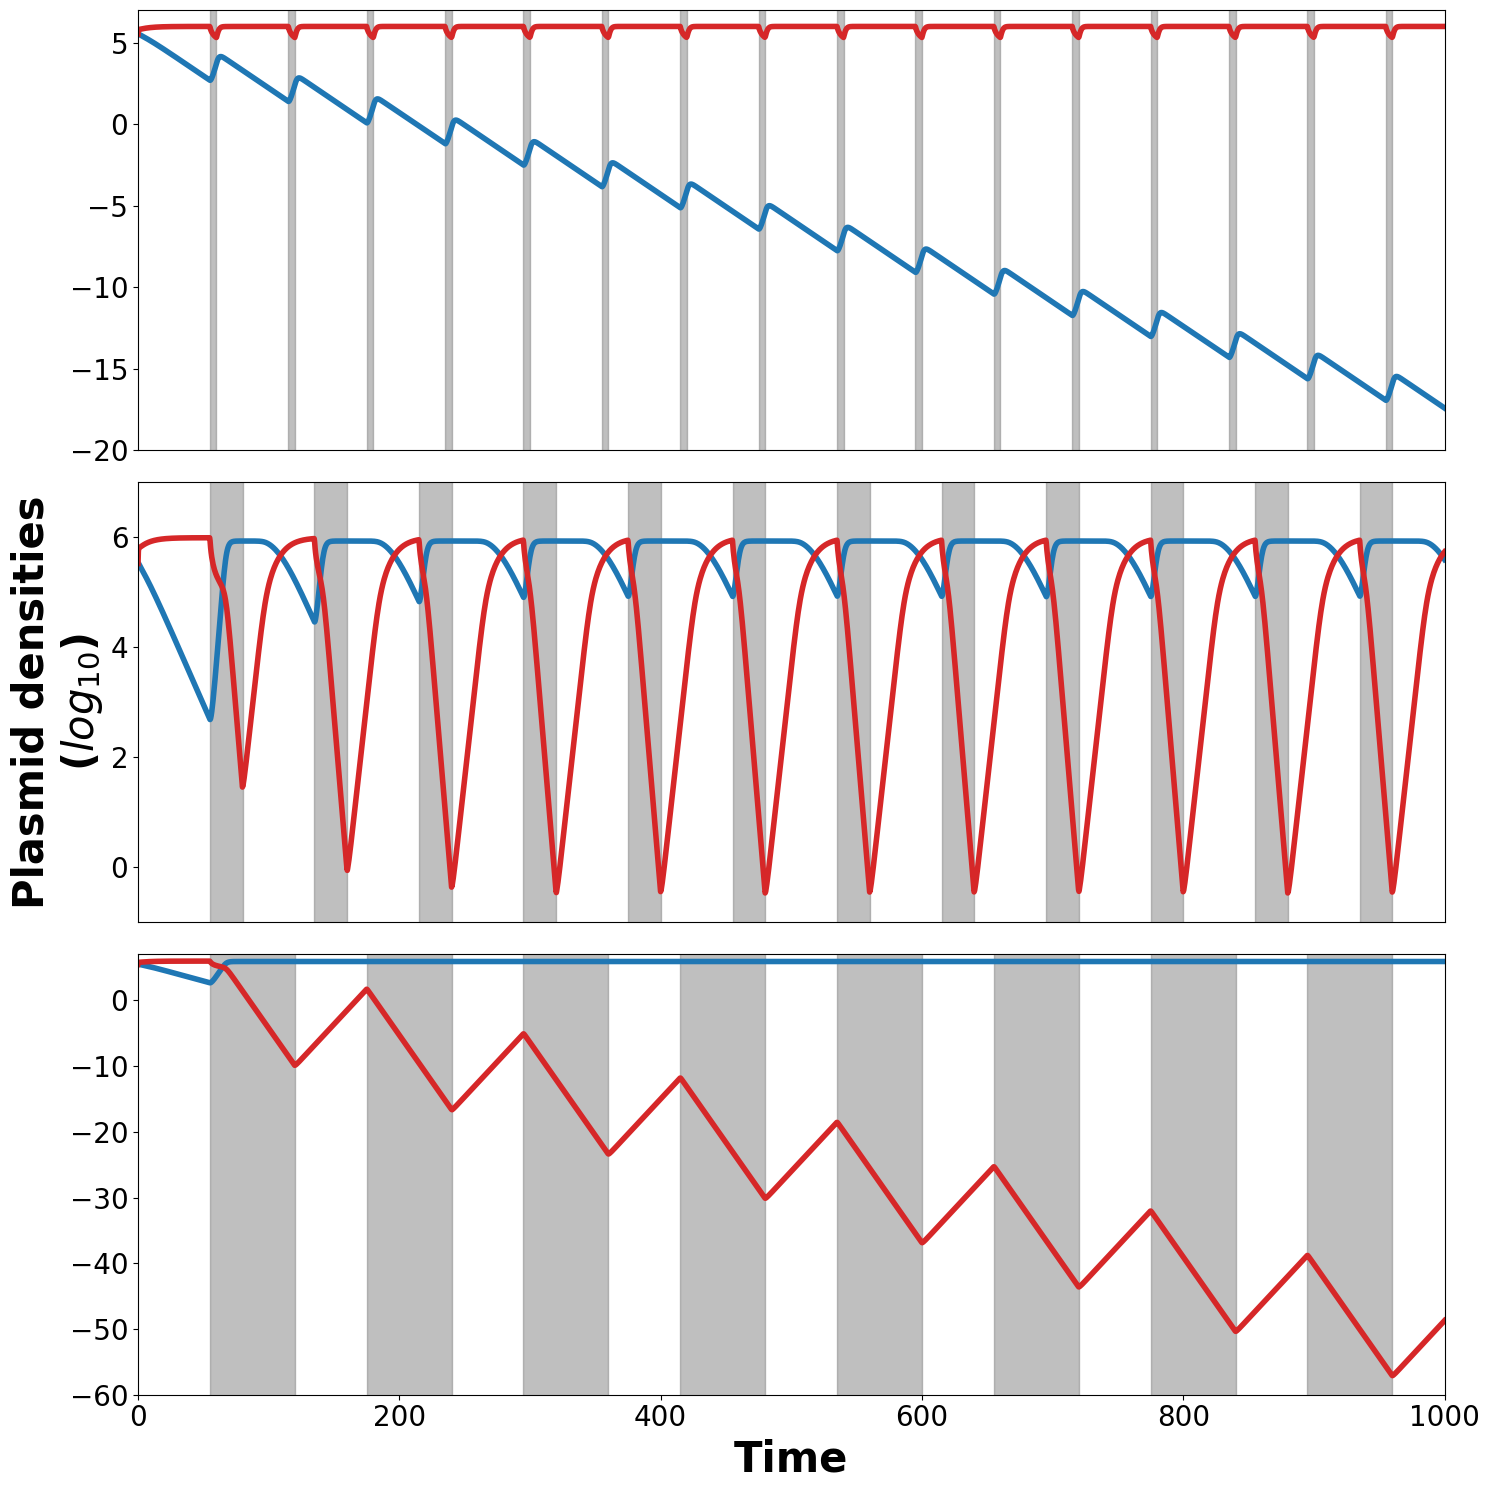

In [17]:
no_stress_d=55
stress_d1=5
stress_d2=25
stress_d3=65

fig, axs=plt.subplots(3,1,figsize=(15,15))

axs[0].plot(solution1.t,np.log10(solution1.y[1]),color="tab:blue",label="Plasmid 1",linewidth=4)
axs[0].plot(solution1.t,np.log10(solution1.y[2]),color="tab:red",label="Plasmid 2",linewidth=4)
for i in range(1,20):
    axs[0].fill_between(np.linspace(i*no_stress_d+(i-1)*stress_d1,i*(no_stress_d+stress_d1),2),-100,10,alpha=0.5,color='grey')

axs[1].plot(solution2.t,np.log10(solution2.y[1]),color="tab:blue",label="Plasmid 1",linewidth=4)
axs[1].plot(solution2.t,np.log10(solution2.y[2]),color="tab:red",label="Plasmid 2",linewidth=4)
for i in range(1,15):
    axs[1].fill_between(np.linspace(i*no_stress_d+(i-1)*stress_d2,i*(no_stress_d+stress_d2),2),-100,10,alpha=0.5,color='grey')

axs[2].plot(solution3.t,np.log10(solution3.y[1]),color="tab:blue",label="Plasmid 1",linewidth=4)
axs[2].plot(solution3.t,np.log10(solution3.y[2]),color="tab:red",label="Plasmid 2",linewidth=4)
for i in range(1,10):
    axs[2].fill_between(np.linspace(i*no_stress_d+(i-1)*stress_d3,i*(no_stress_d+stress_d3),2),-100,10,alpha=0.5,color='grey')

axs[2].set_xlabel('Time',size=30,weight="bold")
axs[1].set_ylabel('Plasmid densities\n($log_{10}$)',size=30,weight="bold")


axs[0].set_xticks([])
axs[1].set_xticks([])
axs[0].set_ylim(-20,7)
axs[1].set_ylim(-1,7)
axs[2].set_ylim(-60,7)
axs[0].set_xlim(0,1000)
axs[1].set_xlim(0,1000)
axs[2].set_xlim(0,1000)

axs[0].tick_params("both",labelsize=20)
axs[1].tick_params("both",labelsize=20)
axs[2].tick_params("both",labelsize=20)


plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### Heatmap

In [4]:
repertory='simulated_data/figure_2_fluctuating_stress/'

In [5]:
stress_vector=np.arange(1,101,1)
n=np.size(stress_vector)
plasmid1=np.zeros((n,n))
plasmid2=np.zeros((n,n))
threshold=0.05

for i in range(n):
    for j in range(n):
        data=np.loadtxt(repertory+'d1='+str(stress_vector[i])+"_d2="+str(stress_vector[j])+".csv", delimiter=',')
        t=data[:,0]
        T=t[-1]
        p1=data[:,2]
        p2=data[:,3]
        period=stress_vector[i]+stress_vector[j]
        period1=np.argmin(np.abs(t - T+period))
        period2=np.argmin(np.abs(t - T+2*period))
        period3=np.argmin(np.abs(t - T+3*period))
        period4=np.argmin(np.abs(t - T+4*period))
        
        p1_1=np.min(np.log10(p1[period1:]))
        p1_2=np.min(np.log10(p1[period2:period1]))
        p1_3=np.min(np.log10(p1[period3:period2]))
        p1_4=np.min(np.log10(p1[period4:period3]))
        
        x=np.array([period1,period2,period3,period4]).reshape(-1, 1)
        y=np.array([p1_1,p1_2,p1_3,p1_4]).reshape(-1, 1)
        reg = LinearRegression().fit(x,y)
        a = reg.coef_
        plasmid1[i,j]=a[0][0]

        p2_1=np.min(np.log10(p2[period1:]))
        p2_2=np.min(np.log10(p2[period2:period1]))
        p2_3=np.min(np.log10(p2[period3:period2]))
        p2_4=np.min(np.log10(p2[period4:period3]))
        
        y=np.array([p2_1,p2_2,p2_3,p2_4]).reshape(-1, 1)
        reg = LinearRegression().fit(x,y)
        a = reg.coef_
        plasmid2[i,j]=a[0][0]

In [6]:
plasmid1_bis=np.transpose(plasmid1)
plasmid2_bis=np.transpose(plasmid2)
threshold=-2e-3
res1=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if(plasmid1_bis[i,j]>threshold):
            res1[i,j]=1
        if(plasmid2_bis[i,j]>threshold):
            res1[i,j]=2
        if(plasmid1_bis[i,j]>threshold and plasmid2_bis[i,j]>threshold):
            res1[i,j]=3 

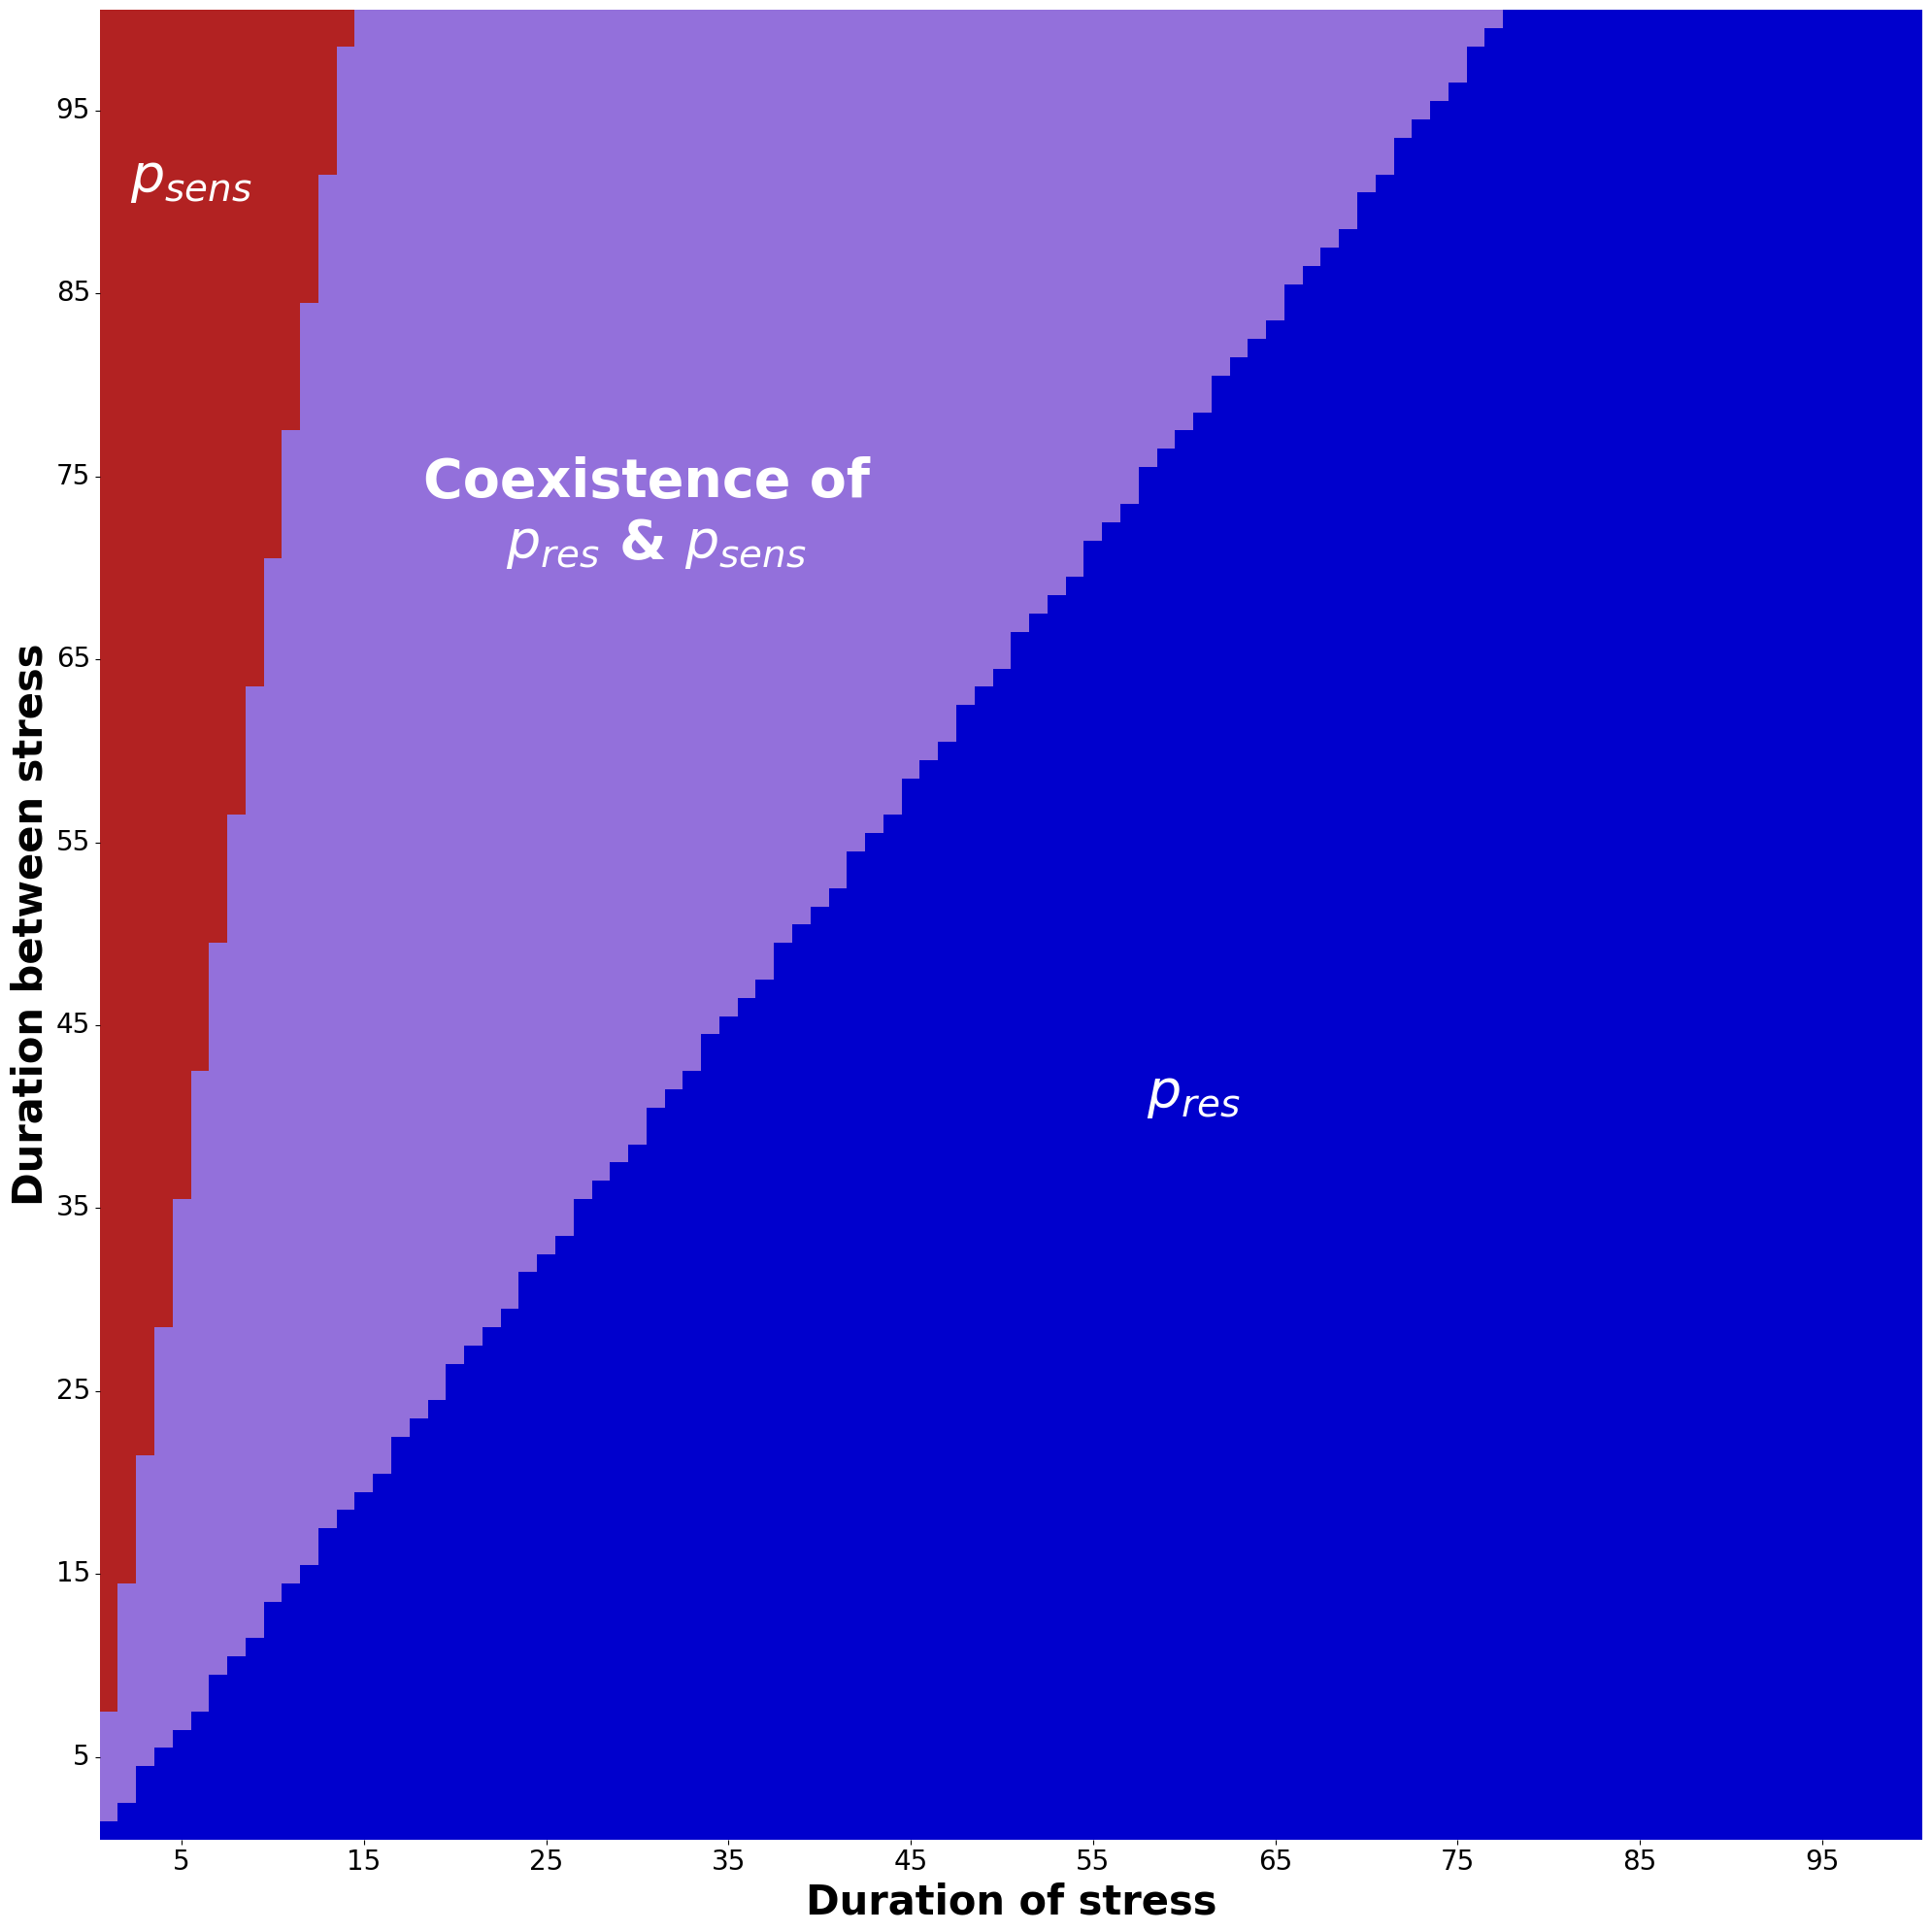

In [7]:
stress_vector_graphe=np.arange(5,101,10)

fig, axs = plt.subplots(1,1,figsize=(20,20),sharex=True,sharey=True)

colors = ["black","mediumblue","firebrick","mediumpurple"]
cmap = LinearSegmentedColormap.from_list("custom", colors, N=3)

sns.heatmap(res1,linewidths=0,cmap=colors,cbar=False,ax=axs,vmin=0,vmax=4)

axs.invert_yaxis()
axs.set_ylabel('Duration between stress', size=30,weight="bold")
axs.set_xlabel('Duration of stress', size=30,weight="bold")
#axs.set_title("Situation 1",size=30,weight="bold")
axs.set_xticks(stress_vector_graphe-0.5)
axs.set_xticklabels(stress_vector_graphe,rotation=0,size=20)
axs.set_yticks(stress_vector_graphe-0.5)
axs.set_yticklabels(stress_vector_graphe,rotation=0,size=20)

axs.text(5,90,'$p_{sens}$',ha='center',fontsize=40,color="white",weight="bold")
axs.text(30,70,'Coexistence of\n $p_{res}$ & $p_{sens}$',ha='center',fontsize=40,color="white",weight="bold")
axs.text(60,40,'$p_{res}$',ha='center',fontsize=40,color="white",weight="bold")

fig.tight_layout(rect=[0, 0, 1, 1])
plt.show()